In [1]:
import re
import numpy as np
import pandas as pd
import missingno as mno

In [2]:
df = pd.read_csv('geocoded.csv')
df.head()

,price,title,furnishing,tenants preferred,bathroom,availability,longitude,latitude,balcony,floor,facing,overlooking,car parking,owner resides,address,gmaps_info,coord
0,"₹ 18,000",3 BHK House for rent in Gudimalkapur 1400 sqft,Unfurnished,Bachelors/Family,2,Immediately,78.437402,17.378782,NaN,NaN,NaN,NaN,NaN,NaN,"Gudimalkapur, Hyderabad",[{'address_components': [{'long_name': 'Gudima...,"(17.3787821, 78.4374024)"
1,"₹ 20,000",3 BHK Villa for rent in Shamshabad 1500 sqft,Unfurnished,Bachelors,3,From Mar '20,17.270166,78.393593,3,NaN,NaN,NaN,NaN,NaN,"Shamshabad, Hyderabad",[{'address_components': [{'long_name': 'Shamsh...,"(17.2619301, 78.387971)"
2,"₹ 5,800",1 BHK Apartment for rent in Vinayak Nagar II-H...,Unfurnished,Family,1,Immediately,78.598729,17.331128,1,1 out of 1 Floor,East,Main Road,NaN,NaN,"Vinayak Nagar II-Hayathnagar, Hyderabad",[{'address_components': [{'long_name': 'Vinaya...,"(17.3311276, 78.5987291)"
3,"₹ 14,000","2 BHK Apartment for rent in Kukatpally, NH 9 1...",Semi-Furnished,Bachelors/Family,2,Immediately,78.399146,17.494868,NaN,2 out of 5 Floors,NaN,NaN,NaN,NaN,"Kukatpally, NH 9, Hyderabad",[{'address_components': [{'long_name': 'Nation...,"(17.4948682, 78.3991456)"
4,"₹ 20,000",3 BHK Apartment for rent in Dellapur 1560 sqft,Semi-Furnished,Bachelors/Family,2,Immediately,78.286481,17.463172,NaN,5 out of 5 Floors,NaN,NaN,NaN,NaN,"Dellapur, Hyderabad",[{'address_components': [{'long_name': 'Tellap...,"(17.463172, 78.2864815)"


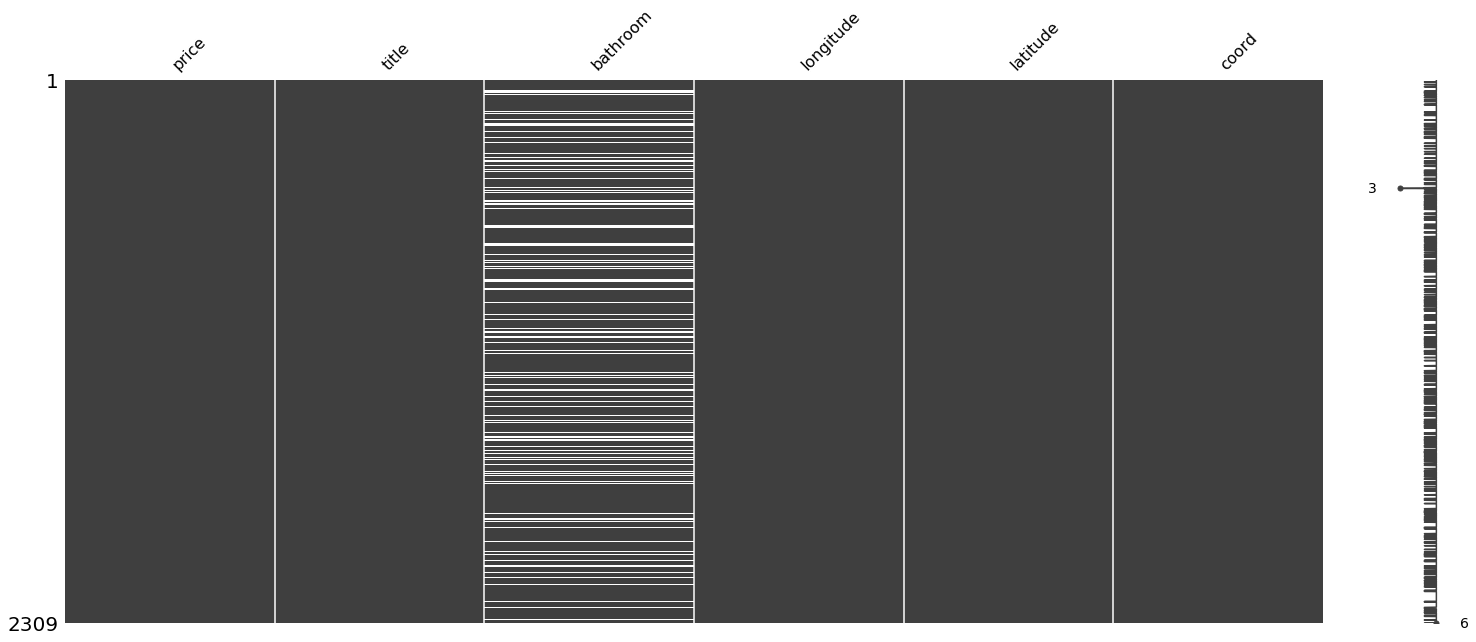

In [3]:
df.drop(columns=['tenants preferred', 'availability', 'balcony', 'furnishing',
                 'floor', 'facing', 'overlooking', 'car parking', 'owner resides',
                 'address', 'gmaps_info'], inplace=True)
mno.matrix(df);

In [4]:
def parse_price(x):
    if ',' in x: return int(re.sub(",", "", x[2:]))
    else: return np.nan
df['price'] = df['price'].apply(parse_price)

In [5]:
def parse_baths(x):
    try: return int(re.findall(r'\d+', x)[0])
    except: return np.nan
df['bathroom'] = df['bathroom'].apply(parse_baths)

In [8]:
def parse_bhk(x):
    try: return int(x.split()[0])
    except: return np.nan
df['bhk'] = df['title'].apply(parse_bhk)

In [10]:
def parse_sqft(x):
    try: return int(x.split()[-2])
    except: return np.nan
df['sqft'] = df['title'].apply(parse_sqft)

In [14]:
df.drop(columns='title', inplace=True)
df.head()

,price,bathroom,longitude,latitude,coord,bhk,sqft
0,18000.0,2.0,78.437402,17.378782,"(17.3787821, 78.4374024)",3.0,1400.0
1,20000.0,3.0,17.270166,78.393593,"(17.2619301, 78.387971)",3.0,1500.0
2,5800.0,1.0,78.598729,17.331128,"(17.3311276, 78.5987291)",1.0,NaN
3,14000.0,2.0,78.399146,17.494868,"(17.4948682, 78.3991456)",2.0,1100.0
4,20000.0,2.0,78.286481,17.463172,"(17.463172, 78.2864815)",3.0,1560.0


In [15]:
df.to_csv('cleaned.csv', index=False)